# Final Project - H&M Customer Purchase Prediction

## ALY6040 - Data Mining

# Introduction



The H&M Group is a collection of brands and companies with about 4,850 physical locations and 53 online marketplaces. Customers can browse a wide assortment of products in our online store. However, if there are too many options, clients could not find what they are looking for or what intrigues them right away, which could prevent them from making a purchase. Product recommendations are essential for improving the buying experience. More importantly, assisting consumers in making sound decisions benefits sustainability since it lowers returns and, as a result, lowers transportation-related emissions.
<br>
<br>
We are going to develop a system to predict next purchases of customers based on data from previous transactions, as well as from customer meta data.



# About the dataset

The dataset contains the following files.

* images/ - a folder of images corresponding to each article_id. The images are placed in subfolders starting with the first three digits of the article_id.
* articles.csv - CSV file containing the detailed metadata for each article_id available for purchase.
* customers.csv - CSV file containing the metadata for each customer_id in dataset.
* transactions_train.csv - CSV file containing the transactions data. It consists of the purchases of each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item.



We are going to start off our analysis by exploring the data, understanding the meaning and significance of the attributes involved properly, and perform necessary actions to streamline our process for the road to our goal.

## Importing data from kaggle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)

We are importing some necessary and important libraries/packages for our analysis.

* Pandas, Numpy, DateTime libraries have been imported to be utilized for exploring and molding the data set according to our needs. 
* Seaborn, Matplotlib libraries have been imported to visually represent the data and insights from it.
* Json library has been imported to download and import dataset from Kaggle.

In [ ]:
# Label Encoding and One-Hot Encoding Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Standardization and Normalization Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Missing Value Imputation
from sklearn.impute import SimpleImputer

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest Classifier and Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification

# SciPy.Stats for Plotting
import scipy.stats as stats
import pylab

# Metrics for understanding the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

These libraries/packages have been imported to perform techniques of Label and One-Hot Encoding, Scaling (Standardization and Normalization), and splitting the data set into train-test sets randomly.

We also imported libraries for imputing missing vaues and Classifiers.

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
json_string = {"username":"","key":""}
with open('/root/.kaggle/kaggle.json', 'w', encoding='utf-8') as f:
    json.dump(json_string, f, ensure_ascii=False, indent=4)


With credentials of Kaggle's account, we are creating a connection to kaggle's storage from where we will be downloading and importing the required data set into this google colab notebook.

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

Giving '600' permission to the json file used for making connection to kaggle's storage for further usages.

## Downloading and Unzipping specific files from Kaggle Dataset

In [ ]:
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f articles.csv
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f customers.csv
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f sample_submission.csv
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f transactions_train.csv

articles.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
customers.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
transactions_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In this step, we are downloading the 4 files from H&M's data set named '*h-and-m-personalized-fashion-recommendations*', stored in kaggle's data storage, into this google colab notebook.

In [ ]:
! unzip /content/articles.csv.zip
! unzip /content/customers.csv.zip
! unzip /content/sample_submission.csv.zip
! unzip /content/transactions_train.csv.zip

Archive:  /content/articles.csv.zip
replace articles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: articles.csv            
Archive:  /content/customers.csv.zip
replace customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customers.csv           
Archive:  /content/sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
Archive:  /content/transactions_train.csv.zip
replace transactions_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: transactions_train.csv  t
y



When a dataset is downloaded or imported from kaggle's data storage, it is stored as a zip file in the google colab's environment.

In this step, we are unzipping the files to be used further for our analysis.

## Initial Exploration on the data

We are reading the '*articles.csv*' file and storing the dataframe into a variable.

In [ ]:
articles = pd.read_csv('/content/articles.csv')

This step will check the first 3 records of the dataframe to get a gist of the records present in it.

In [ ]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


We are reading the '*customers.csv*' file and storing the dataframe into a variable.

In [ ]:
customers = pd.read_csv('/content/customers.csv')

This step will check the first 3 records of the dataframe to get a gist of the records present in it.

In [ ]:
customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


We are reading the '*transaction.csv*' file and storing the dataframe into a variable.

In [ ]:
transactions = pd.read_csv('/content/transactions_train.csv')

This step checks the first 5 (default) records of the dataframe to get a gist of the records present in it.

In [ ]:
transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


## Exploring Transactions Data

Model to predict if a customer will make a purchase within next 90 days of the last purchase

In the below step, we are retrieving the first transactions of each customer.

In [ ]:
first_transaction = transactions[['t_dat','customer_id']].drop_duplicates('customer_id')
first_transaction.head()

,t_dat,customer_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...
12,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...
14,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...


Next, we wanted to retrieve the last transaction of each customer in order to compute the time a customer has been with the H&M organisation.

In [ ]:
last_transaction = transactions[['t_dat','customer_id']].drop_duplicates('customer_id',keep='last')
last_transaction.head()

,t_dat,customer_id
52,2018-09-20,0021da829b898f82269fc51feded4eac2129058ee95bd7...
71,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...
96,2018-09-20,0077ba345ef6aa8781802107df25bbb8a14fdcd04130c3...
109,2018-09-20,00873fc0f81215241785b49518e6758a2c26c0eac4825e...
117,2018-09-20,00923f88cda50cbea4c5ceb2bd3467c620a9d74cb7da95...


A new variable has been generated named 'Vintage' which provides the age of the customer in the organisation using the first and the last transaction made by them. 

In [ ]:
vintage = last_transaction.merge(first_transaction,how='left',on='customer_id')
vintage['vintage'] = pd.to_datetime(vintage['t_dat_x']) - pd.to_datetime(vintage['t_dat_y'])
vintage = vintage[['customer_id','vintage']]
vintage['vintage'] = vintage['vintage'].astype(str).apply(lambda x: int(x.split()[0]))

# Data Manipulation & Feature Engineering

To check the columns of the dataset '*Customers*'

In [ ]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

To check the distribution of data points in accordance to the values present in dataset's features.

In [ ]:
customers[['FN', 'Active', 'club_member_status']].value_counts()

FN   Active  club_member_status
1.0  1.0     ACTIVE                458452
             PRE-CREATE              5631
             LEFT CLUB                  3
dtype: int64

We found that '*customers*' data set has 2 features with a single value across the data points. They would deem to be insignificant features to our model for predictions and therefore, we will not use them further in our process.

In [ ]:
## Filtering customers' demographics
customers = customers[['customer_id','club_member_status','fashion_news_frequency','age']]

In this step, we are checking the first transaction's date and last transaction's date in the *transactions* dataset along with respective number of transactions made on those dates.

In [ ]:
## Checking Transaction dates and number of transactions
print(transactions['t_dat'].min(), ",", transactions[transactions['t_dat'] == transactions['t_dat'].min()].shape[0])

print(transactions['t_dat'].max(), ",", transactions[transactions['t_dat'] == transactions['t_dat'].max()].shape[0])

2018-09-20 , 48399
2020-09-22 , 32866


In the *transactions* dataset, a single feature related to date-time was present. 

In order to treat this feature as a dateTime data type, we have converted it using pandas' function named 'to_datetime'.


In [ ]:
## Converting date to datetime
transactions['t_dat']= pd.to_datetime(transactions['t_dat'])

transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


For the *articles* data set, we have already checked how the data points are stored using head function in one of above steps. We are now exploring the features and their data types to check if some engineering is required to be performed or not on our required features set.

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

For our model building process and it's desired dataset, we have taken out the article IDs and the group names they belong to from *articles* dataset.

We have further merged this dataset with the *transactions* data set.

In [ ]:
## Checking articles group
articles = articles[['article_id','index_group_name']]

In [ ]:
## Merging transactions to articles
transactions = transactions.merge(articles,how='left',on = 'article_id')

To build a model where predictions will be made whether a customer will make a purchase within the next 90 days of their last purchase or not, we have taken a timeline of 22nd March 2020 to 22nd June 2020.

In below step, data is extracted within this timeline from *transactions* table.

In [ ]:
## Taking 3 months range of dates to make the model
transactions_1 = transactions[(transactions['t_dat'] <= '2020-06-22') & (transactions['t_dat'] >= '2020-03-22')]

We have 2 channels as a store (in-person) and online marketplace. To distinguish customers who use both the channels and make purchases from both of them, we have engineered a feature 'Channel 3' which comprises of both the channels 1 and 2.

In [ ]:
## Sales channel Feature engineering
## customer with both channels 1 and 2 marked as channel 3
lst1 = transactions_1[transactions_1['sales_channel_id'] == 1]['customer_id'].values
lst2 = transactions_1[transactions_1['sales_channel_id'] == 2]['customer_id'].values

lst3 = list(set(lst1).intersection(lst2))

lst2 =list(set(lst2)-set(lst3))
lst1 =list(set(lst1)-set(lst3))

channels = pd.DataFrame(zip([2]*len(lst2)+[1]*len(lst1)+[3]*len(lst3),lst2+lst1+lst3),columns =['channel', 'customer_id'])

transactions_1 = transactions_1.merge(channels,how='left', on = 'customer_id').drop('sales_channel_id',axis=1)

In the below step, we are feature engineering the column *index_group_name* to add the feature of *shopping category group* in the above transactions data set.

In [ ]:
## Adding shopping category group features
purchase_group = transactions_1.pivot_table(index='customer_id',columns= 'index_group_name',values='price',aggfunc='sum').reset_index()

purchase_group[['Baby/Children', 'Divided', 'Ladieswear', 'Menswear', 'Sport']] = np.where(purchase_group.drop('customer_id',axis=1).isna(),0,1)

For the construction of dependent variable and various other independent variables after feature engineering to be used for our predictive model, we are keeping customer's latest purchase records/transactions only within the chosen date timeline.

In [ ]:
## Unique customer transactions within the chosen period (keeping latest purchase transaction)
transactions_1 = transactions_1.sort_values('t_dat',ascending=False).drop_duplicates('customer_id')

transactions_1 = transactions_1.drop(['index_group_name','price','article_id'],axis=1)

transactions_1 = transactions_1.merge(purchase_group,how='left',on ='customer_id')

Importing new library for datetime manipulation functions

In [ ]:
from datetime import timedelta

In this below step, we are preparing our data set to include the feature *next_90_days_purchase* which signifies the purchase made by customer in the next 90 days from their last purchase.

This variable is based on the rolling 90 days from customers' last purchase.

In [ ]:
## Purchase in next 90 days rolling from last purchase date (output variable for the model)

## Here, we are calculating the output variable tag. This tag represnts whether customer made a 
## purchase within the next 90 days of his last purchase.

date_dic = {}
start_date = pd.to_datetime('2020-03-22').date()
for i in range(93):
    # start date of looking at transactions.
    small_date = str((start_date + timedelta(days =i)))
    # end date of looking at transactions over 90 days rolling period
    large_date = str((start_date + timedelta(days =i+90)))
    # saving customer ids for each start date in a dictionary
    date_dic[small_date] = list(transactions[(transactions['t_dat'] < large_date) & (transactions['t_dat'] > small_date)]['customer_id'].unique())

len(date_dic),date_dic.keys()

transactions_temp_1 = pd.DataFrame(columns=['t_dat', 'customer_id', 'channel', 'Baby/Children', 'Divided',
       'Ladieswear', 'Menswear', 'Sport', 'next_90_days_purchase'])

for i in range(93):
    start_date = pd.to_datetime('2020-03-22').date()
    date1 = str(start_date+timedelta(days=i))
    # print(date1)
    ## filtering transactions for each date
    transactions_temp = transactions_1[transactions_1['t_dat'] == date1]
    ## checking customer ids that made transactions in the next 90 days of the date. 
    next_90_days_temp = pd.DataFrame(zip(date_dic[date1],[1]* len(date_dic[date1])),columns =['customer_id','next_90_days_purchase'])
    ## merging the data
    transactions_temp = transactions_temp.merge(next_90_days_temp,how='left',on ='customer_id')
    transactions_temp_1 = transactions_temp_1.append(transactions_temp)

transactions_2 = transactions_temp_1.copy()

transactions_2['next_90_days_purchase'] = transactions_2.replace(np.nan,0)['next_90_days_purchase'].astype(int)

transactions_2['t_dat']= pd.to_datetime(transactions_2['t_dat'])

transactions_2.head()

,t_dat,customer_id,channel,Baby/Children,Divided,Ladieswear,Menswear,Sport,next_90_days_purchase
0,2020-03-22,53f385f0c0b4aaeb1b068c429506cfdb8ae9c635073bf0...,2,0,0,1,0,0,0
1,2020-03-22,5427b45555b5197e04bd8a734ba1f18c5785366248cc9e...,2,0,1,1,0,0,0
2,2020-03-22,54705646f873bf4117075cc74ef5f2e6fb9cb7763cbc30...,2,0,0,1,1,0,0
3,2020-03-22,5428334a49f0adc8314f876fbe80664227159dc45179fa...,2,0,0,1,0,0,0
4,2020-03-22,545732b4b16f87cd47ceba16e8fa3bef3d0250a9c5f676...,2,0,1,1,0,0,0


Next, we are extracting and preparing our data set to include the feature *last_30_days_purchase* which signifies the purchase made by customer in the last 30 days from their last purchase.

This variable represents the historic purchasing behaviour of the customer and the timeline considered is all set as one of the first steps in our analysis in this notebook.


In [ ]:
## Historic purchase behaviour

### Last 30 days purchase
## Creating a feature for the immediate historic purchase behaviour. Checking if a customer 
## made a transaction within the last 30 days of the latest purchase

date_dic = {}
start_date = pd.to_datetime('2020-06-22').date()
for i in range(93):
    # print(i)
    large_date = str((start_date - timedelta(days =i)))
    small_date = str((start_date - timedelta(days =i+30)))
    date_dic[large_date] = list(transactions[(transactions['t_dat'] < large_date) & (transactions['t_dat'] > small_date)]['customer_id'].unique())

len(date_dic),date_dic.keys()

transactions_temp_1 = pd.DataFrame(columns=['t_dat', 'customer_id', 'channel', 'Baby/Children', 'Divided',
       'Ladieswear', 'Menswear', 'Sport', 'next_90_days_purchase','last_30_days_purchase'])

for i in range(93):
    start_date = pd.to_datetime('2020-06-22').date()
    date1 = str(start_date-timedelta(days=i))
    #print(date1)
    transactions_temp = transactions_2[transactions_2['t_dat'] == date1]
    next_90_days_temp = pd.DataFrame(zip(date_dic[date1],[1]* len(date_dic[date1])),columns =['customer_id','last_30_days_purchase'])
    transactions_temp = transactions_temp.merge(next_90_days_temp,how='left',on ='customer_id')
    #print(transactions_temp.shape,next_90_days_temp.shape)
    transactions_temp_1 = transactions_temp_1.append(transactions_temp)
    #print(transactions_temp_1.shape)

transactions_3 = transactions_temp_1.copy()

transactions_3['last_30_days_purchase'] = transactions_3.replace(np.nan,0)['last_30_days_purchase'].astype(int)

transactions_3['t_dat']= pd.to_datetime(transactions_3['t_dat'])


transactions_3.head()



,t_dat,customer_id,channel,Baby/Children,Divided,Ladieswear,Menswear,Sport,next_90_days_purchase,last_30_days_purchase
0,2020-06-22,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,3,0,1,1,0,0,0,0
1,2020-06-22,5568cd1206b68b3a393d8061ef8b65280cd2cb53e056df...,2,0,1,1,0,0,1,0
2,2020-06-22,5562af7b2ae6fc5877c8d09dd1f0e5c146770cd1749ec1...,1,0,0,1,0,0,0,1
3,2020-06-22,5563362a23822df5b506b6454bbd56e979f519158740dd...,1,0,1,1,1,0,1,1
4,2020-06-22,55671e825ca601d36e09c3232f51300e2bfed7f29ecbcb...,3,0,1,1,0,1,1,1


As one of the last step for our data preparation, we are extracting information and preparing a feature *last_90_days_purchase* which signifies the purchase made by customer in the last 90 days from their last purchase respectively.

This variable represents the mid-term historic purchasing behaviour of the customer.


In [ ]:
### Last 90 days purchase

## Creating a feature for the mid-term historic purchase behaviour. Checking if a customer 
## made a transaction within the last 90 days of the latest purchase

date_dic = {}
start_date = pd.to_datetime('2020-06-22').date()
for i in range(93):
    #print(i)
    large_date = str((start_date - timedelta(days =i)))
    small_date = str((start_date - timedelta(days =i+90)))
    date_dic[large_date] = list(transactions[(transactions['t_dat'] < large_date) & (transactions['t_dat'] > small_date)]['customer_id'].unique())

len(date_dic),date_dic.keys()

transactions_temp_1 = pd.DataFrame(columns=['t_dat', 'customer_id', 'channel', 'Baby/Children', 'Divided',
       'Ladieswear', 'Menswear', 'Sport', 'next_90_days_purchase','last_30_days_purchase','last_90_days_purchase'])

for i in range(93):
    start_date = pd.to_datetime('2020-06-22').date()
    date1 = str(start_date-timedelta(days=i))
    #print(date1)
    transactions_temp = transactions_3[transactions_3['t_dat'] == date1]
    next_90_days_temp = pd.DataFrame(zip(date_dic[date1],[1]* len(date_dic[date1])),columns =['customer_id','last_90_days_purchase'])
    transactions_temp = transactions_temp.merge(next_90_days_temp,how='left',on ='customer_id')
    transactions_temp_1 = transactions_temp_1.append(transactions_temp)

transactions_4 = transactions_temp_1.copy()

transactions_4['last_90_days_purchase'] = transactions_4.replace(np.nan,0)['last_90_days_purchase'].astype(int)

transactions_4['t_dat']= pd.to_datetime(transactions_4['t_dat'])

transactions_4.head()

,t_dat,customer_id,channel,Baby/Children,Divided,Ladieswear,Menswear,Sport,next_90_days_purchase,last_30_days_purchase,last_90_days_purchase
0,2020-06-22,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,3,0,1,1,0,0,0,0,1
1,2020-06-22,5568cd1206b68b3a393d8061ef8b65280cd2cb53e056df...,2,0,1,1,0,0,1,0,0
2,2020-06-22,5562af7b2ae6fc5877c8d09dd1f0e5c146770cd1749ec1...,1,0,0,1,0,0,0,1,1
3,2020-06-22,5563362a23822df5b506b6454bbd56e979f519158740dd...,1,0,1,1,1,0,1,1,1
4,2020-06-22,55671e825ca601d36e09c3232f51300e2bfed7f29ecbcb...,3,0,1,1,0,1,1,1,1


After preparing the final dataset for our predicting modelling, we are going to append customers' with their respective details from the *customers* dataset in each transactions.

In [ ]:
## adding customer attributes to transactions
transactions_4 = transactions_4.merge(customers,how='left',on='customer_id')

transactions_4['age'] = transactions_4['age'].fillna(transactions_4['age'].mean()).astype(int)

transactions_4 = transactions_4.merge(vintage,how='left',on ='customer_id')

transactions_4.drop(['t_dat','customer_id'],axis=1,inplace=True)

transactions_4


,channel,Baby/Children,Divided,Ladieswear,Menswear,Sport,next_90_days_purchase,last_30_days_purchase,last_90_days_purchase,club_member_status,fashion_news_frequency,age,vintage
0,3,0,1,1,0,0,0,0,1,ACTIVE,Regularly,18,78
1,2,0,1,1,0,0,1,0,0,ACTIVE,NONE,37,375
2,1,0,0,1,0,0,0,1,1,ACTIVE,Regularly,65,619
3,1,0,1,1,1,0,1,1,1,ACTIVE,NONE,35,578
4,3,0,1,1,0,1,1,1,1,ACTIVE,Regularly,21,696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520042,2,0,0,1,0,0,0,0,0,ACTIVE,Regularly,49,540
520043,2,0,0,1,0,0,0,0,0,ACTIVE,NONE,28,671
520044,2,0,0,1,0,0,0,0,0,ACTIVE,NONE,22,499
520045,2,0,1,1,0,0,0,0,0,PRE-CREATE,NONE,28,0


# Exploratory Data Analysis

To start off the exploratory data analysis part, we are first plotting histograms to check the distribution of 'last_90_days_purchase', 'age', and 'vintage' variables of the transaction data set.

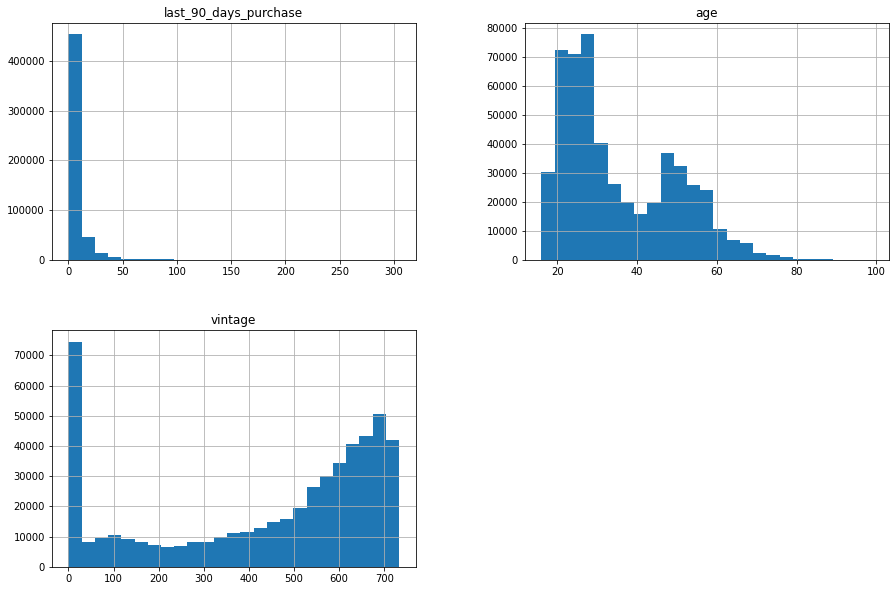

In [ ]:
transactions_4.hist(bins=25, figsize=(15,10))
plt.show()

We can find out the below points from these histograms:

1. Customers belonging to the age group of 20 - 30 have purchased the most number of times from the H&M stores following by the age group of 45 - 50.
2. The 'vintage' variable is left-skewed suggesting that most of the customers have been in association with the organisation for a long time. We can check a large portion of H&M's customers have been in association since 3 years. 


### Correlation Matrix

In [ ]:
transactions_4.corr()

,last_90_days_purchase,age,vintage
last_90_days_purchase,1.000000,0.006721,0.287322
age,0.006721,1.000000,0.071163
vintage,0.287322,0.071163,1.000000


### Correlation Plot

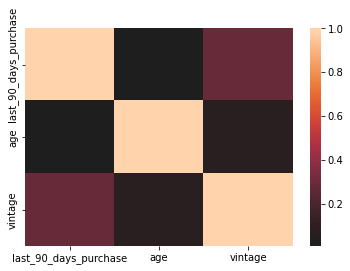

In [ ]:
sns.heatmap(transactions_4.corr(), center=0);

From the correlation matrix and plot, we can see that these 3 integer features of the data set do not have strong association with the target variable and each other as well. The highest associated integer feature to the target variable 'last_90_days_purchase' is 'vintage' with a value around 0.3.

In [ ]:
transactions_4.dtypes

channel                   object
Baby/Children             object
Divided                   object
Ladieswear                object
Menswear                  object
Sport                     object
next_90_days_purchase     object
last_30_days_purchase     object
last_90_days_purchase      int64
club_member_status        object
fashion_news_frequency    object
age                        int64
vintage                    int64
dtype: object

## Histogram: 'Vintage'

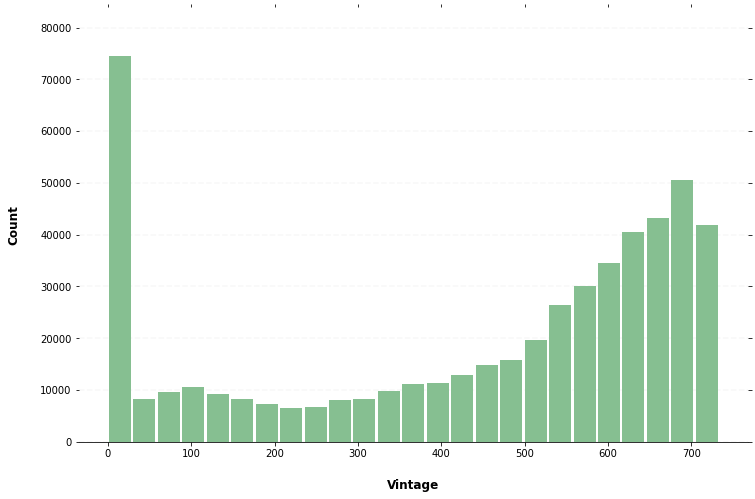

In [ ]:
ax = transactions_4.hist(column='vintage', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    vals = x.get_yticks() # Draw horizontal axis lines
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    
    x.set_title("") # Remove title
    x.set_xlabel("Vintage", labelpad=20, weight='bold', size=12) # Set x-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12) # Set y-axis label

In the above graph, we have plotted a featured variable named 'vintage' to check its distribution in the data set.

We can check that the variable is left-skewed suggesting that most of the customers have been in association with the organisation for a long time. 

The graph shows that a large portion of H&M's customers have been in association with the H&M store since last 3 years.

In [ ]:
transactions_4['channel'].value_counts()

2    355693
1     84069
3     80285
Name: channel, dtype: int64

Upon checking the value count of the transaction's channel feature, we found out that around a staggering 355,000 customers used channel 2 (In-Person Retail Stores) and around 84,000 customers used channel 1 (Online E-Commerce Website).

Around 80,000 customers were those who used both channels for making purchases from H&M store.

## Violin Plots

Violin Plots are an amalgamation of Box plot and Kernel Density plot.

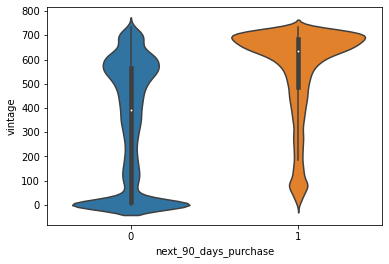

In [ ]:
sns.violinplot(x=transactions_4['next_90_days_purchase'],y=transactions_4['vintage'])

From the above violin plot, we can check the distribution and summary statistics of the 'vintage' feature segregated on the boolean values of 'next_90_days_purchase' feature.

1. The median of 'vintage' feature for data points belonging to 0 value of 'next_90_days_purchase' is around 400 days which is very low compared to the median value of data points of customers who made the purchase in the next 90 days.

2. The median value of 'vintage' variable for customers who purchased in the next 90 days is around 620. This suggests that customers who have higher probability to purchase in the next 90 days have been in association with the H&M store longer than those who will not make purchase.

3. The violin plot also shows that a major portion of customers who have not made purchases in the next 90 days have associated with the H&M organisation very recently.

4. The plot shows that a very large base of customers who will make purchases in the next 90 days have been in association with the H&M store and organisation since the last 3 years.

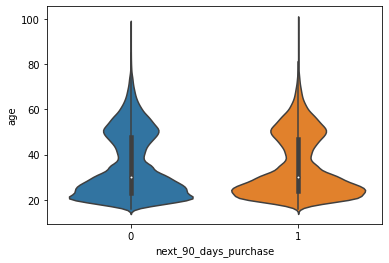

In [ ]:
sns.violinplot(x=transactions_4['next_90_days_purchase'],y=transactions_4['age'])

The above violin plot depicts the distribution of the 'age' feature with 'next_90_days_purchase' feature.

1. The median values of age for both the groups of customers, who are going to make purchases in the next 90 days and who are not, is almost same at around 30.

2. The density distributions of the plot are also same amongst the customer bases, who will and who will not make purchases in the next 90 days, suggesting that the age distribution is almost same and no age factor is playing a role in deciding whether a customer will make a purchase in the next 90 days or not.

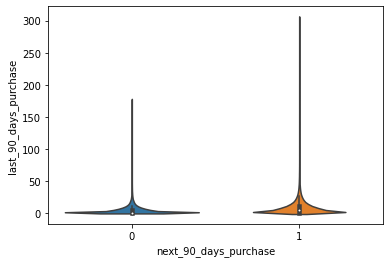

In [ ]:
sns.violinplot(x=transactions_4['next_90_days_purchase'],y=transactions_4['last_90_days_purchase'])

## Count Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


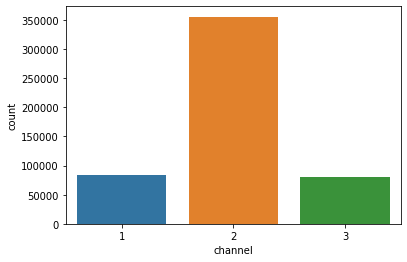

In [ ]:
sns.countplot(transactions_4['channel'])

The above plot is a bar plot depicting the counts of the channels which the customers have used to make purchases from the H&M store.

1. Channel 1 represents the 'Online Store' which suggests that around 100,000 customers made purchases using the e-commerce website of H&M store.

2. Channel 2 represents the 'In-Person Retail Stores' of H&M organisation. Around 350,000 customers made purchases using the offline retail stores.

3. Channel 3 represents those customers who use both the channels (1 and 2) to make purchases from the H&M organisation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


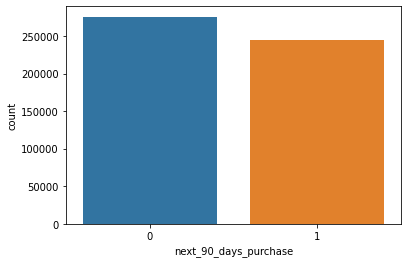

In [ ]:
sns.countplot(transactions_4['next_90_days_purchase'])

The above bar chart shows that around 250,000 customers will not make purchases in the next 90 days whereas around 225,000 customers will make purchases in the next 90 days.

# Predictive Modeling

## Dependent & Independent Variables


**Dependent Variable** - *next_90_days_purchase*
<br>
<br>
**Independent Variable** - All of other features in the data set which were feature-engineered or taken directly from the data set except *next_90_days_purchase*

In [ ]:
## Output and input variables for the model
Y = transactions_4['next_90_days_purchase']
X = transactions_4.drop('next_90_days_purchase',axis=1)

## Data Preprocessing - One Hot Encoding, Scaling

Since, in our dataset, all the categorical variables are not ranked. Therefore, we are proceeding further with One Hot Encoding to these categorical variables.
<br>
<br>
We are applying scaling technique of *Standard Scaler* to scale the feature around unit variance only.


In [ ]:
## Encoding the variables
one_hot = ['channel','club_member_status','fashion_news_frequency']
## Scaling this numeric feature.
std_scale  = ['age']

ct = ColumnTransformer(transformers=[('sc',StandardScaler(),std_scale),('encoder',OneHotEncoder(),one_hot)],remainder='passthrough')
X = ct.fit_transform(X)
X_labels = ct.get_feature_names_out()

X  = X.astype(float)
Y = Y.values
Y= Y.astype(int)

## Test Train Split
Data Splicing is the process of splitting the data into a training set and a testing set. The training set is used to build the models and the testing set is used to validate the efficiency of the model. The splitting is performed in the above code snippet.


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,stratify=Y, random_state=0)
print(X_train.shape, X_val.shape, Y.shape)

(390035, 20) (130012, 20) (520047,)


In [ ]:
##Checking class ratio
sum(Y)/len(Y)

0.47033825788822936

## Model Building and Validation

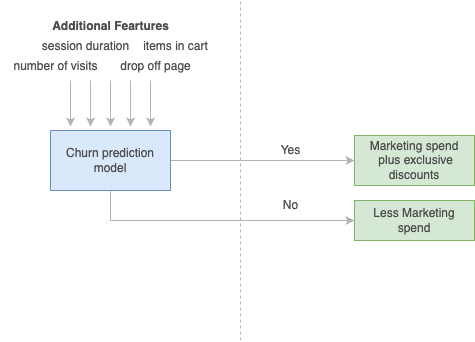

### Decision Tree

In [ ]:
labels = transactions_4['next_90_days_purchase']

We are moving forward with hyper-parameter tuning with the decision tree model to retrieve the best possible set of hyper-parameters for this data set.

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro')
    clf.fit(X_train, Y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 5, 'min_samples_split': 2}

Grid scores on development set:
0.717 (+/-0.003) for {'max_depth': 1, 'min_samples_split': 2}
0.717 (+/-0.003) for {'max_depth': 1, 'min_samples_split': 4}
0.717 (+/-0.003) for {'max_depth': 1, 'min_samples_split': 6}
0.717 (+/-0.003) for {'max_depth': 1, 'min_samples_split': 8}
0.717 (+/-0.003) for {'max_depth': 1, 'min_samples_split': 10}
0.717 (+/-0.003) for {'max_depth': 2, 'min_samples_split': 2}
0.717 (+/-0.003) for {'max_depth': 2, 'min_samples_split': 4}
0.717 (+/-0.003) for {'max_depth': 2, 'min_samples_split': 6}
0.717 (+/-0.003) for {'max_depth': 2, 'min_samples_split': 8}
0.717 (+/-0.003) for {'max_depth': 2, 'min_samples_split': 10}
0.749 (+/-0.003) for {'max_depth': 3, 'min_samples_split': 2}
0.749 (+/-0.003) for {'max_depth': 3, 'min_samples_split': 4}
0.749 (+/-0.003) for {'max_depth': 3, 'min_samples_split': 6}
0.749 (+/-0.003) for {'max_depth': 

Incorporating the results of hyper-parameters from hyperparameter tuning in the above step, we are building the decision tree model in the step.

Best parameters set found on development set:

{'max_depth': 5, 'min_samples_split': 2}

In [ ]:
## Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_split = 2, random_state = 0)
clf.fit(X_train, Y_train)
test_pred_decision_tree = clf.predict(X_val)

Feature Importance

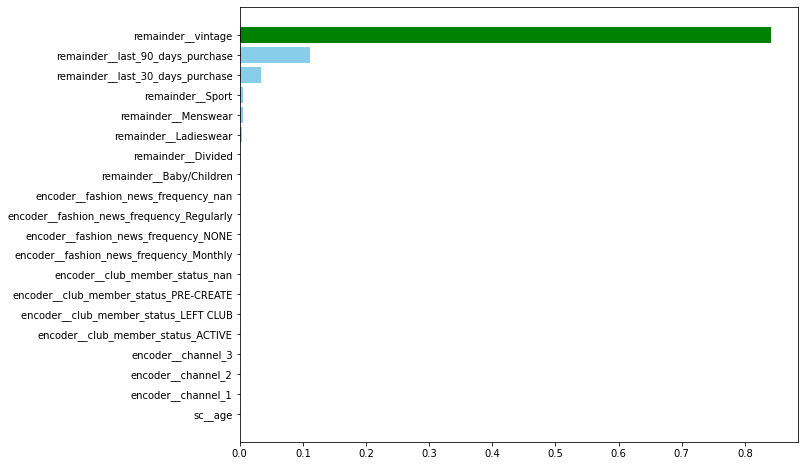

In [ ]:
importance = clf.feature_importances_[clf.feature_importances_.argsort()]
plt.figure(figsize=(10,8))
clrs = ['skyblue' if (x < max(importance)) else 'green' for x in importance ]
plt.barh(X_labels, clf.feature_importances_[clf.feature_importances_.argsort()], color=clrs)
plt.show()

We have plotted a graph to show the importance indicator of the features of the data set.

We can check that 'remainder_vintage' feature has the highest importance and holds a very large share of importance from other features (such as, remainder_last_90_days_purchase, remainder_last_30_days_purchase) to the target variable.

Retrieving the Confusion Matrix in an object to plot in in further step.

In [ ]:
#get the confusion matrix
confusion_matrix = confusion_matrix(Y_val, test_pred_decision_tree)

#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)

In [ ]:
accuracy_score(Y_val, test_pred_decision_tree)

0.7674522351782912

**Observation** - The accuracy of the training and the test set is almost similar, around 77%, indicating that the model is not over fitting.

Confusion Matrix

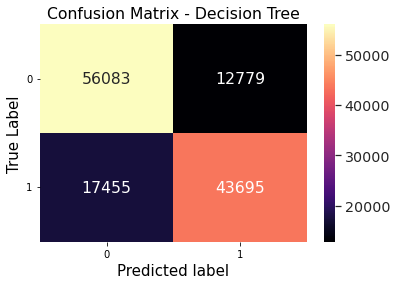

<Figure size 720x504 with 0 Axes>

In [ ]:
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

The confusion matrix above shows us that a large part of the data sets have been predicted correctly when we consider True-Positives and True-Negatives.

We can infer from the confusion matrix as well as the accuracy the same kind of information that the model is not over-fitting.

We performed hyper-parameter tuning using Grid Search to find out the best possible parameter set for the model and the data set. The parameters 'min_sample_split' and 'max_depth' were provided as the best possible parameters after tuning by the model.

In [ ]:
#get the precision score
precision = precision_score(Y_val,
                            test_pred_decision_tree, 
                            average=None)

#turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels.unique())

#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
0,0.762640
1,0.773719


In [ ]:
recall = recall_score(Y_val, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels.unique())
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
0,0.814426
1,0.714554


In [ ]:
f1 = f1_score(Y_val, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels.unique())
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
0,0.787683
1,0.742961


The Model Metrics (Precision, Recall, F1 Score) also tell us the story that decision tree model is yielding a result where fallback on the data set is not very high and is good in nature. 

The prediction results hold good for both the cases where customers, who will make purchases in the next 90 days, will make purchases affirmatively and the other way around as well.

### Random Forest

After the implementation of Decision Tree, we have applied Random Forest model to predict churning of customers. 

To be able to validate the model, Out of the Bag Score (OOB Score) has been used which comes out ot be around 68%. We did not just go with the accuracy score of the model as the model may have been overfitting and accuracy wouldn't be the right metric to use.

In [ ]:
clf = RandomForestClassifier(n_estimators= 100, oob_score = True, random_state=0)
clf.fit(X_train, Y_train)

print(clf.oob_score_)

0.723250477521248


To apply hyperparameter tuning and find the best set of parameters to find the best solution for the built model, we are using *Randomized Search CV* technique for the model.

We are going to use the numbers of estimators in the range of 50 to 200 with intervals of 15 and maximum features from 0.1 till 1.

The model with parameters tuned has been created and will be used further to predict the churn of customers.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators':np.arange(50, 150, 25),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

clf = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, Y_train)
clf = clf.best_estimator_

In [ ]:
clf

RandomForestClassifier(max_depth=9, max_features=0.6, max_samples=0.3,
                       n_estimators=75)

We have performed hyper-parameter tuning and retreived the best parameters to be used in Random Forest Classifier.

In [ ]:
clf = RandomForestClassifier(max_depth=9, max_features=0.6, max_samples=0.3, n_estimators=75, oob_score = True, random_state=0)
clf.fit(X_train, Y_train)
test_pred_decision_tree = clf.predict(X_val)

In this step, we are using the random forest classifier model and predicting the churning of customers from the testing dataset.

Feature Importance

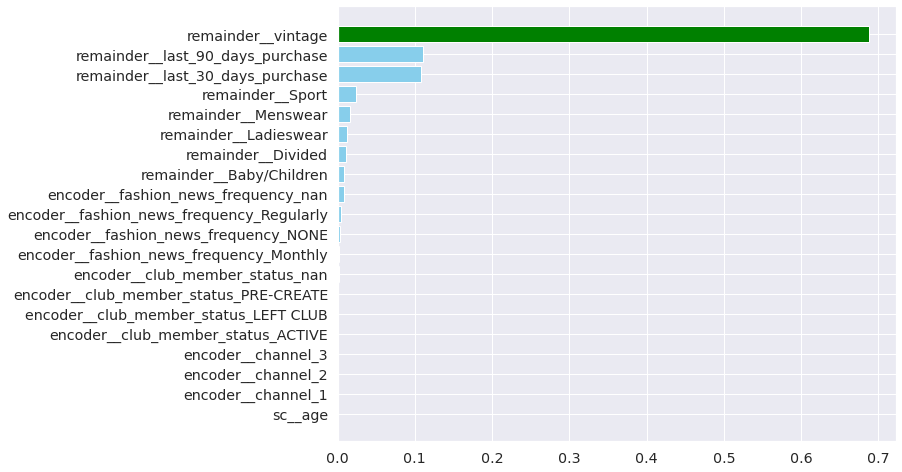

In [ ]:
importance = clf.feature_importances_[clf.feature_importances_.argsort()]
plt.figure(figsize=(10,8))
clrs = ['skyblue' if (x < max(importance)) else 'green' for x in importance ]
plt.barh(X_labels, clf.feature_importances_[clf.feature_importances_.argsort()], color=clrs)
plt.show()

We have plotted a graph to show the importance indicator of the features of the data set.

We can check that 'remainder_vintage' feature has the highest importance and holds a very large share of importance from other features (such as, remainder_last_90_days_purchase, remainder_last_30_days_purchase) to the target variable.

Some other features (remainder_sport, remainder_Menswear, etc.) have also cropped up with some importance factor in the chart but they are relatively very low when compared with the above mentioned features.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_val, test_pred_decision_tree))
print(classification_report(Y_val, test_pred_decision_tree))
print(accuracy_score(Y_val, test_pred_decision_tree))

[[55203 13659]
 [16121 45029]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     68862
           1       0.77      0.74      0.75     61150

    accuracy                           0.77    130012
   macro avg       0.77      0.77      0.77    130012
weighted avg       0.77      0.77      0.77    130012

0.7709442205334892


**Observation** - The accuracy of the training and the test set is almost similar, around 77%, indicating that the model is not over fitting.

Confusion Matrix

In [ ]:
#get the confusion matrix
confusion_matrix = confusion_matrix(Y_val, test_pred_decision_tree)

#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)

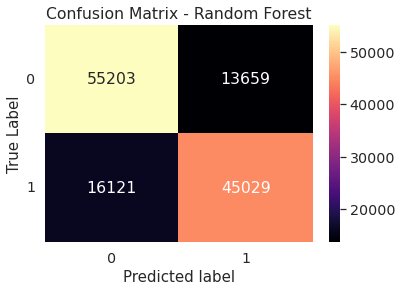

<Figure size 720x504 with 0 Axes>

In [ ]:
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

#set axis titles
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

The confusion matrix above shows us that a large part of the data sets have been predicted correctly when we consider True-Positives and True-Negatives.

Similar information which were inferred from the metrics can be inferred from the confusion matrix as well. The accuracy, precision, and recall were tried to be improved using hyperparamter tuning of the model using RandomizedSearchCV.

### Gradient Boosting Classifier

After the implementation of Decision Tree and Random Forest Classification, we have applied another ensemble technique of Gradient Boosting Classification to predict whether a customer will buy in the next 90 days. Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy.

<br>
A base GBM model is fit with 50 trees, learning rate of 0.1, and max depth of tree as 10.

In [ ]:
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=10, random_state=0)
clf.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=0)

In [ ]:
print(accuracy_score(clf.predict(X_train),Y_train))
print(accuracy_score(clf.predict(X_val),Y_val))

0.7895958055046342
0.7728594283604591


**Observation** - The accuracy of the training and the test set is almost similar, around 78%, indicating that the model is not over fitting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [ ]:
#creating Scoring parameter: 
#scoring = {'accuracy': make_scorer(accuracy_score),
#           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

In [ ]:
# A sample parameter

#parameters = {
#    #"loss":["deviance"],
#    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#    #"min_samples_split": np.linspace(0.1, 0.5, 12),
#    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
#    "max_depth":[3, 5, 8, 10, 12],
#    "max_features":["log2","sqrt"],
#    #"criterion": ["friedman_mse",  "mae"],
#    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#    "n_estimators":[35, 40, 45, 50, 55, 60]
#    }

In [ ]:
#passing the scoring function in the GridSearchCV
#clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

#clf.fit(X_train, Y_train)
#converting the clf.cv_results to dataframe
#df=pd.DataFrame.from_dict(clf.cv_results_)
#here Possible inputs for cross validation is cv=2, there two split split0 and split1
#df[['split0_test_accuracy','split1_test_accuracy','split0_test_precision','split1_test_precision','split0_test_recall','split1_test_recall']]

Feature Importance

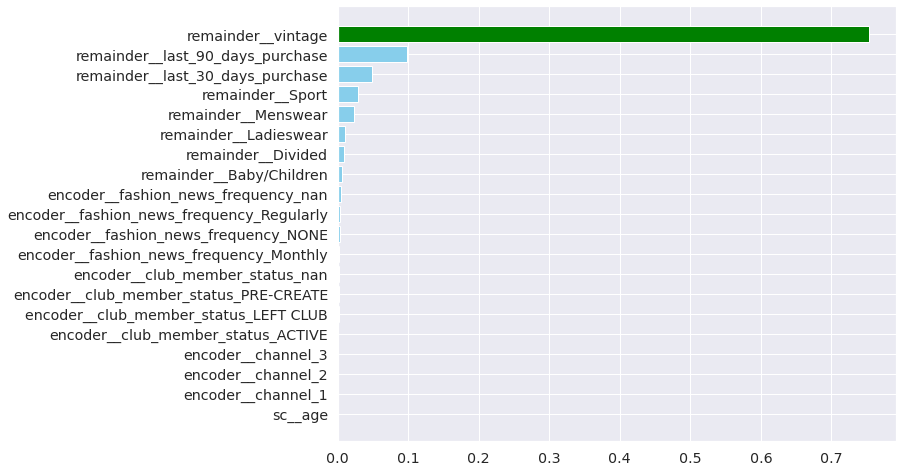

In [ ]:
importance = clf.feature_importances_[clf.feature_importances_.argsort()]
plt.figure(figsize=(10,8))
clrs = ['skyblue' if (x < max(importance)) else 'green' for x in importance ]
plt.barh(X_labels, clf.feature_importances_[clf.feature_importances_.argsort()], color=clrs)
plt.show()

In the above step, we have again plotted a graph to show the importance indicator of the features of the transactions data set.

In this model of 'Gradient Boosting', we can check that 'remainder_vintage' feature again has the highest importance and holds a very large share of importance from other features (such as, remainder_last_90_days_purchase, remainder_last_30_days_purchase) to the target variable.

In this model, some other features (remainder_sport, remainder_Menswear, etc.) have also cropped up with some importance factor in the chart but they are relatively very low when compared with the above mentioned features.

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(clf.predict(X_val), Y_val))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.78      0.79     69251
           1       0.76      0.76      0.76     60761

    accuracy                           0.77    130012
   macro avg       0.77      0.77      0.77    130012
weighted avg       0.77      0.77      0.77    130012



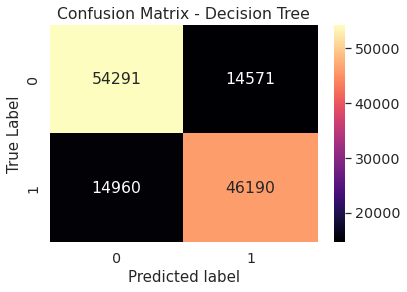

<Figure size 720x504 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_val,clf.predict(X_val))

matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

The confusion matrix above shows us that a large part of the data sets have been predicted correctly when we consider True-Positives and True-Negatives.

Similar information can be inferred from the model metrics. The accuracy, precision, and recall can be tried to improve using hyperparamter tuning of the model using grid search and indentifying the optimal learning rate.


Grid search is used to tune the hyperparameters of the individual models and the boosting operation in GBM. The parameters 'min_sample_split' and 'min_samples_leaf' will be tuned. The 'min_sample_split' is kept in the range of 1000 and 2100, whereaas 'min_samples_leaf' is in the range of 30 and 71. 


The other parameters of the model are kept constant. The attribute 'best_params_' of the GridSearchCV class gives the best parameters on which the model will have the highest accuracy.

In [ ]:
param_test = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=10, max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test, scoring='roc_auc', n_jobs=4, cv=5)
gsearch.fit(X_train, Y_train)
gsearch.best_params_, gsearch.best_score_

({'min_samples_leaf': 50, 'min_samples_split': 1400}, 0.8620145558417944)

Another paramter that can be tuned is the learning rate. Learning rate helps determine the optimal value of the optimisation process and the execution speed. In order to find a better solution to our built model by changing parameters, we built a method to change the learning rate parameter of the model and check the model's accuracy on both of the training and testing data sets. The model with best parameters generated through grid search is run across loop to indentify the optimal learning rate.

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, Y_val)))

Learning rate:  0.05
Accuracy score (training): 0.694
Accuracy score (validation): 0.690
Learning rate:  0.075
Accuracy score (training): 0.696
Accuracy score (validation): 0.690
Learning rate:  0.1
Accuracy score (training): 0.696
Accuracy score (validation): 0.689
Learning rate:  0.25
Accuracy score (training): 0.698
Accuracy score (validation): 0.688
Learning rate:  0.5
Accuracy score (training): 0.699
Accuracy score (validation): 0.686
Learning rate:  0.75
Accuracy score (training): 0.700
Accuracy score (validation): 0.685
Learning rate:  1
Accuracy score (training): 0.698
Accuracy score (validation): 0.685


In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=50, min_samples_split=1800, learning_rate=0.5, max_depth=10, random_state=0)
clf.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, min_samples_leaf=50,
                           min_samples_split=1800, random_state=0)

In [ ]:
print(accuracy_score(clf.predict(X_train),Y_train))
print(accuracy_score(clf.predict(X_val),Y_val))

0.6965349263527633
0.688897947881734


**Observation** - The accuracy of the training and the test set is almost similar, around 79%, indicating that the model is not over fitting.

### Neural Network Classifier

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt

The last model that we tried to predict the next purchase of the customers is a neural network. The convolutional neural network has a total of 5 layers, out of which two are linear layers.

Before building the model, the training and the validation set needs to be converted to tensors. The training and validation train set will be a rank 2 tensor, whereas the training and validation target variable will be a rank 1 tensor.

In [ ]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

In [ ]:
class nn_model(nn.Module):
  
  def __init__(self,n):
    super().__init__()
    torch.manual_seed(0)
    self.n = n
    self.net = nn.Sequential(
        nn.Linear(self.n, 4),
        nn.Sigmoid(),
        nn.Linear(4, 2),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
        
    )

  def forward(self, X):
    return self.net(X)

NameError: ignored

The following functions are the to compute the accuracy, prediction and recall of the model, which will be used to evaluate the performance of the model using the validation set.

<br>
The accuracy, precision, and recall functions takes y_hat, probability of the observation to be 1 or 0, and the target label to output the accuracy, precision, and recall.

In [ ]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [ ]:
def recall(y_hat, y):
    pred = torch.argmax(y_hat, dim=1)
    a = torch.logical_and((pred == y),(pred == 1)).float().sum()
    b = (y ==1).float().sum()
    return (a/b).item()

In [ ]:
def precision(y_hat, y):
    pred = torch.argmax(y_hat, dim=1)
    a = torch.logical_and((pred == y),(pred == 1)).float().sum()
    b = (pred ==1).float().sum()
    return (a/b).item()

The next function 'fit' takes the following input paramters:
* Training and validation feature set
* Training and validation target variable
* Model object
* Optimizer function
* Loss function
* Number of eopchs

The function perform the weight updation using gradient descent for a total of 100 eopchs. The loss of the model is computed after every epoch, and a plot is generated.



In [ ]:
def fit(x, y, x_test, y_test, model, opt, loss_fn, epochs = 100):
  acc_arr = []
  test_acc_arr = []
  for epoch in range(epochs):
    y_hat = model(x)
    y_hat_test = model(x_test)
    loss = loss_fn(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    acc_arr.append(accuracy(y_hat, y))
    test_acc_arr.append(accuracy(y_hat_test, y_test))
    if epoch%100==0:
        print(f"epoch : {epoch}, Loss :{loss.item()} ")
  
  plt.plot(test_acc_arr,'b')
  plt.plot(acc_arr,'r')
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  print(f"Train accuracy {acc_arr[-1]}, Test accuracy {test_acc_arr[-1]}", )
  return loss.item()

Defining the model object, loss function, and the optimizer for the neural network. The neural network model is created with 5 layers, the loss function for the optimization is defined as cross entropy.

In [ ]:
lm = nn_model(len(X[0]))
loss_fn = F.cross_entropy
opt = optim.Adam(lm.parameters(),lr=0.1)

The following are the random parameters (weights and biases) assigned to convolutional neural network model at the starting of the epochs. Each of the following tensors are the weights for the subsequent layers of the model.

In [ ]:
list(lm.parameters())

[Parameter containing:
 tensor([[-0.0017,  0.1231, -0.1888, -0.1688, -0.0884,  0.0615, -0.0045,  0.1819,
          -0.0204,  0.0607, -0.0693, -0.0451, -0.2192, -0.1519, -0.0946,  0.0085,
           0.0907,  0.1377, -0.1555],
         [-0.0999,  0.0833,  0.1905, -0.0472,  0.1717, -0.0370,  0.0243,  0.2077,
          -0.2128, -0.1444, -0.0581, -0.0894,  0.1982, -0.1487, -0.1056, -0.1603,
          -0.2149, -0.1339,  0.1972],
         [ 0.1024,  0.1112,  0.0121, -0.1176,  0.0388, -0.2142, -0.1658, -0.1183,
           0.1447,  0.1345, -0.1017, -0.0083,  0.1467,  0.2281,  0.0911,  0.0310,
           0.1538, -0.1351,  0.0428],
         [-0.1779, -0.1590, -0.1185,  0.1038,  0.0923, -0.1359,  0.0693,  0.1259,
          -0.0290,  0.0088,  0.0532,  0.1423,  0.2203, -0.1768, -0.0841,  0.0902,
           0.1901,  0.1996,  0.2024]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0457, -0.1995,  0.0211, -0.1435], requires_grad=True),
 Parameter containing:
 tensor([[-0.4660,  0.4442,  0.380

In [ ]:
X_train = X_train.float()
Y_train = Y_train.long()
X_val = X_val.float()
Y_val = Y_val.long()

The fit function trains the neural network model, using the model, loss, and optimizer defined above.

epoch : 0, Loss :0.691119372844696 
epoch : 100, Loss :0.6283866167068481 
epoch : 200, Loss :0.6279436945915222 
epoch : 300, Loss :0.6278011202812195 
epoch : 400, Loss :0.6277256608009338 
epoch : 500, Loss :0.6276674270629883 
epoch : 600, Loss :0.6276190280914307 
Train accuracy 0.6922942996025085, Test accuracy 0.6889671683311462
Final loss 0.6275858283042908


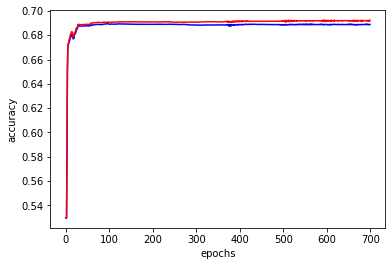

In [ ]:
print('Final loss', fit(X_train, Y_train, X_val,Y_val ,lm, opt, loss_fn,epochs=700))

**Observation** - The loss decreases in the first 200 epochs, but plateaus in the next epoch. Only 200 epochs are required for the model to train. The train and the test accuracy is around 78%, indicating that although the model is not very accurate but does not overfit.

In [ ]:
print(f"Train Accracy: {accuracy(lm(X_train),Y_train)} \nTest Accuracy:{accuracy(lm(X_val),Y_val)}")

Train Accracy: 0.6917763948440552 
Test Accuracy:0.6887595057487488


**Observation** - The train and the test accuracy is around 78%, indicating that although the model is not very accurate but does not overfit.

In [ ]:
print(f"Train Recall: {recall(lm(X_train),Y_train)} \nTest Recall:{recall(lm(X_val),Y_val)}")

Train Recall: 0.6769165992736816 
Test Recall:0.673017144203186


**Observation** - The train and the test recall is around 67%. 

### H2O AutoML Model

Automated Machine Learning (AutoML) is the process of automating tasks in the machine learning pipeline such as data preprocessing, hyperparameter tuning, model selection and evaluation.

Installing H2O library which will enable us to utilize the _Automated Machine Learning (AutoML)_ functionality.

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 29 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=6b49fffaec0bf7cd5b573d70d7507cf552dde780aa4d793cbf391526b369b416
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


Importing H2O and its AutoML package in this notebook.

In [ ]:
import h2o
from h2o.automl import H2OAutoML

Initializing an instance of H2O library.
It is an instance of H2O Cluster.

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8gy4y9yy
  JVM stdout: /tmp/tmp8gy4y9yy/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8gy4y9yy/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,"14 days, 2 hours and 15 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_zoeso5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Firstly, in order to use the H2O package and utilize AutoML feature, we need to load the _transactions_ data set as an H2OFrame.

Since, our target is to classify whether customers will make purchases in the next 90 days or not, we are converting the target variable 'next_90_days_purchase' into a categorical variable and keeping its values as factors.

In [ ]:
import h2o
import pandas as pd

transactions_4['next_90_days_purchase'] = pd.Categorical(transactions_4.next_90_days_purchase)
hf = h2o.H2OFrame(transactions_4)
hf['next_90_days_purchase'] = hf['next_90_days_purchase'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Describing the H2OFrame object to check its structure and find out the summary statistics.

In [ ]:
hf.describe()

Rows:520047
Cols:13




,channel,Baby/Children,Divided,Ladieswear,Menswear,Sport,next_90_days_purchase,last_30_days_purchase,last_90_days_purchase,club_member_status,fashion_news_frequency,age,vintage
type,int,int,int,int,int,int,int,int,int,enum,enum,int,int
mins,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,16.0,0.0
mean,1.992723734585536,0.050356986964639736,0.5266773964660887,0.8826490682572922,0.1240734010579813,0.11816047395716156,0.47033825788822925,0.3563504837062804,0.5702523041186662,,,35.158306845342885,437.112220626217
maxs,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,,,99.0,733.0
sigma,0.5621249712636436,0.21868070967536007,0.4992882893439371,0.3218382974972363,0.3296655899359933,0.32279835302481574,0.49911988548823605,0.47892093033793187,0.49504048824559344,,,13.902002197507995,251.6537456538945
zeros,0,493859,246150,61028,455523,458598,275449,334728,223489,,,0,62369
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,ACTIVE,Regularly,18.0,78.0
1,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,ACTIVE,NONE,37.0,375.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,ACTIVE,Regularly,65.0,619.0


Splitting the data set (H2O Frame) into the training and testing data sets in the ratio 8:2. 

Seed value will hold its split intact for future references.

In [ ]:
train, test = hf.split_frame(ratios=[0.8], seed = 1)

In this step, we are configuring the AutoML model and its training parameters.

1. Maximum Number of Models to Train is set to 15.
2. Balance_classes: It is set to true to balance the class labels for tasks with imbalanced data.
3. Seed has been set for reproducibility.
4. We have added another parameter named 'max_runtime_secs' set to 600 seconds which defines the maximum number of seconds the model will run.

In [ ]:
aml = H2OAutoML(max_models =15, balance_classes=True, seed =1, max_runtime_secs = 600)

After configuring the model parameters, we have set the training data set and defined the target variable in it for training of the model.

H2O AutoML trains and cross validates the following models in the following order:

1. 3 pre-specified XGBoost GBM (Gradient Boosting Machine) models
2. 1 fixed grid of GLMs
3. 1 default Random Forest (DRF)
4. 5 pre-specified H2O GBMs
5. 1 near-default Deep Neural Net
6. 1 Extremely Randomized Forest (XRT)
7. 1 random grid of XGBoost GBMs
8. 1 random grid of H2O GBMs
9. 1 random grid of Deep Neural Nets

In total AutoML runs 15 machine learning models.

In addition, it also trains:

1. A stacked ensemble of all the models trained above
2. A “Best of Family” Stacked Ensemble that contains the best performing model for each algorithm class

In [ ]:
aml.train(training_frame = train, y = 'next_90_days_purchase')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_6_20220817_204013

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.14420389856565255
RMSE: 0.37974188413401616
LogLoss: 0.4325155824815761
Null degrees of freedom: 9975
Residual degrees of freedom: 9968
Null deviance: 13799.013942496094
Residual deviance: 8629.550901672405
AIC: 8645.550901672405
AUC: 0.8747585456076397
AUCPR: 0.8641137908473735
Gini: 0.7495170912152793

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42268698763734225: 


,,0,1,Error,Rate
0,0,3863.0,1404.0,0.2666,(1404.0/5267.0)
1,1,794.0,3915.0,0.1686,(794.0/4709.0)
2,Total,4657.0,5319.0,0.2203,(2198.0/9976.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.422687,0.780814,239.0
1,max f2,0.165699,0.866731,349.0
2,max f0point5,0.637278,0.790343,155.0
3,max accuracy,0.494505,0.786588,210.0
4,max precision,0.997409,1.000000,0.0
5,max recall,0.013615,1.000000,393.0
6,max specificity,0.997409,1.000000,0.0
7,max absolute_mcc,0.494505,0.571552,210.0
8,max min_per_class_accuracy,0.471418,0.782799,219.0
9,max mean_per_class_accuracy,0.494505,0.785519,210.0



Gains/Lift Table: Avg response rate: 47.20 %, avg score: 46.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010024,0.988879,2.118496,2.118496,1.000000,0.993710,1.000000,0.993710,0.021236,0.021236,111.849650,111.849650,0.021236
1,2,0.020048,0.975348,2.118496,2.118496,1.000000,0.982701,1.000000,0.988205,0.021236,0.042472,111.849650,111.849650,0.042472
2,3,0.030072,0.968294,2.097312,2.111435,0.990000,0.971370,0.996667,0.982594,0.021024,0.063495,109.731153,111.143484,0.063306
3,4,0.040096,0.962515,2.097312,2.107904,0.990000,0.965179,0.995000,0.978240,0.021024,0.084519,109.731153,110.790401,0.084139
4,5,0.050020,0.958544,2.097098,2.105760,0.989899,0.960550,0.993988,0.974730,0.020811,0.105330,109.709754,110.576004,0.104761
5,6,0.100040,0.929021,2.042078,2.073919,0.963928,0.944889,0.978958,0.959810,0.102145,0.207475,104.207778,107.391891,0.203488
6,7,0.150060,0.864943,1.897731,2.015190,0.895792,0.898613,0.951236,0.939411,0.094925,0.302400,89.773133,101.518972,0.288540
7,8,0.200080,0.798731,1.838295,1.970966,0.867735,0.831374,0.930361,0.912402,0.091952,0.394351,83.829455,97.096593,0.367961
8,9,0.300020,0.681742,1.602153,1.848110,0.756269,0.740180,0.872369,0.855033,0.160119,0.554470,60.215282,84.811037,0.481943
9,10,0.400060,0.580688,1.360678,1.726222,0.642285,0.631945,0.814833,0.799247,0.136122,0.690592,36.067761,72.622165,0.550285




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.15062143698897215
RMSE: 0.38809977710502763
LogLoss: 0.44913239392224913
Null degrees of freedom: 41556
Residual degrees of freedom: 41549
Null deviance: 57456.774168580756
Residual deviance: 37329.18978845381
AIC: 37345.18978845381
AUC: 0.8631140959019307
AUCPR: 0.8468544047785241
Gini: 0.7262281918038613

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36040581921576537: 


,,0,1,Error,Rate
0,0,14567.0,7475.0,0.3391,(7475.0/22042.0)
1,1,2578.0,16937.0,0.1321,(2578.0/19515.0)
2,Total,17145.0,24412.0,0.2419,(10053.0/41557.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.360406,0.771143,263.0
1,max f2,0.169081,0.863251,344.0
2,max f0point5,0.598642,0.772263,169.0
3,max accuracy,0.501562,0.773035,207.0
4,max precision,0.997859,1.000000,0.0
5,max recall,0.004137,1.000000,397.0
6,max specificity,0.997859,1.000000,0.0
7,max absolute_mcc,0.453166,0.546996,227.0
8,max min_per_class_accuracy,0.473665,0.771714,218.0
9,max mean_per_class_accuracy,0.453166,0.774004,227.0



Gains/Lift Table: Avg response rate: 46.96 %, avg score: 46.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010010,0.987302,2.129490,2.129490,1.000000,0.992721,1.000000,0.992721,0.021317,0.021317,112.949014,112.949014,0.021317
1,2,0.020021,0.973808,2.093657,2.111574,0.983173,0.979604,0.991587,0.986162,0.020958,0.042275,109.365737,111.157375,0.041958
2,3,0.030031,0.967020,2.078300,2.100483,0.975962,0.970077,0.986378,0.980800,0.020805,0.063080,107.830047,110.048266,0.062308
3,4,0.040017,0.961913,2.057652,2.089794,0.966265,0.964276,0.981359,0.976677,0.020548,0.083628,105.765191,108.979429,0.082222
4,5,0.050004,0.957949,2.042258,2.080301,0.959036,0.959909,0.976901,0.973328,0.020395,0.104023,104.225801,108.030076,0.101845
5,6,0.100007,0.925940,2.012665,2.046483,0.945140,0.943844,0.961020,0.958586,0.100641,0.204663,101.266536,104.648306,0.197313
6,7,0.150011,0.860747,1.920435,2.004467,0.901829,0.895497,0.941290,0.937556,0.096029,0.300692,92.043528,100.446713,0.284087
7,8,0.200014,0.799503,1.740074,1.938369,0.817132,0.830007,0.910250,0.910669,0.087010,0.387702,74.007423,93.836891,0.353857
8,9,0.299998,0.686889,1.579564,1.818786,0.741757,0.742368,0.854095,0.854578,0.157930,0.545632,57.956404,81.878647,0.463107
9,10,0.400005,0.581181,1.329138,1.696367,0.624158,0.635919,0.796607,0.799910,0.132923,0.678555,32.913797,69.636698,0.525166


Leaderboard Evaluation

After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.



In [ ]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_6_20220817_204013,0.863114,0.449132,0.846854,0.235614,0.3881,0.150621
StackedEnsemble_BestOfFamily_1_AutoML_6_20220817_204013,0.863054,0.449332,0.846618,0.234032,0.388159,0.150667
GBM_2_AutoML_6_20220817_204013,0.862933,0.450174,0.845944,0.234038,0.388202,0.150701
GBM_3_AutoML_6_20220817_204013,0.862853,0.450417,0.845358,0.233956,0.388274,0.150757
XGBoost_3_AutoML_6_20220817_204013,0.862809,0.45052,0.846419,0.233699,0.388805,0.15117
GBM_5_AutoML_6_20220817_204013,0.862471,0.451193,0.844555,0.236007,0.38855,0.150971
XGBoost_grid_1_AutoML_6_20220817_204013_model_2,0.861955,0.450764,0.845323,0.236455,0.388918,0.151257
GBM_4_AutoML_6_20220817_204013,0.861796,0.451814,0.843681,0.238228,0.389009,0.151328
XGBoost_2_AutoML_6_20220817_204013,0.860624,0.45366,0.844036,0.235402,0.390343,0.152368
GBM_1_AutoML_6_20220817_204013,0.860268,0.453881,0.84219,0.23685,0.390123,0.152196


The leaderboard is the summary board of the models used to train and predict the values.

But, to get the best performing model and examine its results, we are performing the below step.

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_6_20220817_204013

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.14420389856565255
RMSE: 0.37974188413401616
LogLoss: 0.4325155824815761
Null degrees of freedom: 9975
Residual degrees of freedom: 9968
Null deviance: 13799.013942496094
Residual deviance: 8629.550901672405
AIC: 8645.550901672405
AUC: 0.8747585456076397
AUCPR: 0.8641137908473735
Gini: 0.7495170912152793

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42268698763734225: 


,,0,1,Error,Rate
0,0,3863.0,1404.0,0.2666,(1404.0/5267.0)
1,1,794.0,3915.0,0.1686,(794.0/4709.0)
2,Total,4657.0,5319.0,0.2203,(2198.0/9976.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.422687,0.780814,239.0
1,max f2,0.165699,0.866731,349.0
2,max f0point5,0.637278,0.790343,155.0
3,max accuracy,0.494505,0.786588,210.0
4,max precision,0.997409,1.000000,0.0
5,max recall,0.013615,1.000000,393.0
6,max specificity,0.997409,1.000000,0.0
7,max absolute_mcc,0.494505,0.571552,210.0
8,max min_per_class_accuracy,0.471418,0.782799,219.0
9,max mean_per_class_accuracy,0.494505,0.785519,210.0



Gains/Lift Table: Avg response rate: 47.20 %, avg score: 46.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010024,0.988879,2.118496,2.118496,1.000000,0.993710,1.000000,0.993710,0.021236,0.021236,111.849650,111.849650,0.021236
1,2,0.020048,0.975348,2.118496,2.118496,1.000000,0.982701,1.000000,0.988205,0.021236,0.042472,111.849650,111.849650,0.042472
2,3,0.030072,0.968294,2.097312,2.111435,0.990000,0.971370,0.996667,0.982594,0.021024,0.063495,109.731153,111.143484,0.063306
3,4,0.040096,0.962515,2.097312,2.107904,0.990000,0.965179,0.995000,0.978240,0.021024,0.084519,109.731153,110.790401,0.084139
4,5,0.050020,0.958544,2.097098,2.105760,0.989899,0.960550,0.993988,0.974730,0.020811,0.105330,109.709754,110.576004,0.104761
5,6,0.100040,0.929021,2.042078,2.073919,0.963928,0.944889,0.978958,0.959810,0.102145,0.207475,104.207778,107.391891,0.203488
6,7,0.150060,0.864943,1.897731,2.015190,0.895792,0.898613,0.951236,0.939411,0.094925,0.302400,89.773133,101.518972,0.288540
7,8,0.200080,0.798731,1.838295,1.970966,0.867735,0.831374,0.930361,0.912402,0.091952,0.394351,83.829455,97.096593,0.367961
8,9,0.300020,0.681742,1.602153,1.848110,0.756269,0.740180,0.872369,0.855033,0.160119,0.554470,60.215282,84.811037,0.481943
9,10,0.400060,0.580688,1.360678,1.726222,0.642285,0.631945,0.814833,0.799247,0.136122,0.690592,36.067761,72.622165,0.550285




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.15062143698897215
RMSE: 0.38809977710502763
LogLoss: 0.44913239392224913
Null degrees of freedom: 41556
Residual degrees of freedom: 41549
Null deviance: 57456.774168580756
Residual deviance: 37329.18978845381
AIC: 37345.18978845381
AUC: 0.8631140959019307
AUCPR: 0.8468544047785241
Gini: 0.7262281918038613

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36040581921576537: 


,,0,1,Error,Rate
0,0,14567.0,7475.0,0.3391,(7475.0/22042.0)
1,1,2578.0,16937.0,0.1321,(2578.0/19515.0)
2,Total,17145.0,24412.0,0.2419,(10053.0/41557.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.360406,0.771143,263.0
1,max f2,0.169081,0.863251,344.0
2,max f0point5,0.598642,0.772263,169.0
3,max accuracy,0.501562,0.773035,207.0
4,max precision,0.997859,1.000000,0.0
5,max recall,0.004137,1.000000,397.0
6,max specificity,0.997859,1.000000,0.0
7,max absolute_mcc,0.453166,0.546996,227.0
8,max min_per_class_accuracy,0.473665,0.771714,218.0
9,max mean_per_class_accuracy,0.453166,0.774004,227.0



Gains/Lift Table: Avg response rate: 46.96 %, avg score: 46.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010010,0.987302,2.129490,2.129490,1.000000,0.992721,1.000000,0.992721,0.021317,0.021317,112.949014,112.949014,0.021317
1,2,0.020021,0.973808,2.093657,2.111574,0.983173,0.979604,0.991587,0.986162,0.020958,0.042275,109.365737,111.157375,0.041958
2,3,0.030031,0.967020,2.078300,2.100483,0.975962,0.970077,0.986378,0.980800,0.020805,0.063080,107.830047,110.048266,0.062308
3,4,0.040017,0.961913,2.057652,2.089794,0.966265,0.964276,0.981359,0.976677,0.020548,0.083628,105.765191,108.979429,0.082222
4,5,0.050004,0.957949,2.042258,2.080301,0.959036,0.959909,0.976901,0.973328,0.020395,0.104023,104.225801,108.030076,0.101845
5,6,0.100007,0.925940,2.012665,2.046483,0.945140,0.943844,0.961020,0.958586,0.100641,0.204663,101.266536,104.648306,0.197313
6,7,0.150011,0.860747,1.920435,2.004467,0.901829,0.895497,0.941290,0.937556,0.096029,0.300692,92.043528,100.446713,0.284087
7,8,0.200014,0.799503,1.740074,1.938369,0.817132,0.830007,0.910250,0.910669,0.087010,0.387702,74.007423,93.836891,0.353857
8,9,0.299998,0.686889,1.579564,1.818786,0.741757,0.742368,0.854095,0.854578,0.157930,0.545632,57.956404,81.878647,0.463107
9,10,0.400005,0.581181,1.329138,1.696367,0.624158,0.635919,0.796607,0.799910,0.132923,0.678555,32.913797,69.636698,0.525166


The Model named 'H2OStackedEnsembleEstimator :  Stacked Ensemble' is the best performing model amongst those 15 models with 2 different ensemble models.

In [ ]:
best_model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1501474207644027
RMSE: 0.38748860727046247
LogLoss: 0.4480406789755789
Null degrees of freedom: 103706
Residual degrees of freedom: 103699
Null deviance: 143397.3125746758
Residual deviance: 92929.90938904072
AIC: 92945.90938904072
AUC: 0.8639311122165425
AUCPR: 0.8474529976142591
Gini: 0.727862224433085

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3835120941586859: 


,,0,1,Error,Rate
0,0,37515.0,17445.0,0.3174,(17445.0/54960.0)
1,1,7161.0,41586.0,0.1469,(7161.0/48747.0)
2,Total,44676.0,59031.0,0.2373,(24606.0/103707.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.383512,0.771697,257.0
1,max f2,0.165625,0.863956,348.0
2,max f0point5,0.621860,0.773550,162.0
3,max accuracy,0.508420,0.775049,207.0
4,max precision,0.997745,1.000000,0.0
5,max recall,0.004555,1.000000,397.0
6,max specificity,0.997745,1.000000,0.0
7,max absolute_mcc,0.508420,0.547942,207.0
8,max min_per_class_accuracy,0.475551,0.774017,220.0
9,max mean_per_class_accuracy,0.467513,0.774295,223.0



Gains/Lift Table: Avg response rate: 47.00 %, avg score: 46.90 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010009,0.988437,2.127454,2.127454,1.000000,0.993428,1.000000,0.993428,0.021294,0.021294,112.745400,112.745400,0.021294
1,2,0.020008,0.974196,2.098732,2.113100,0.986500,0.981339,0.993253,0.987386,0.020986,0.042280,109.873234,111.310009,0.042025
2,3,0.030008,0.967751,2.063856,2.096691,0.970106,0.970719,0.985540,0.981832,0.020637,0.062917,106.385605,109.669068,0.062098
3,4,0.040007,0.962718,2.051547,2.085407,0.964320,0.965207,0.980236,0.977677,0.020514,0.083431,105.154677,108.540743,0.081939
4,5,0.050006,0.958098,2.026928,2.073714,0.952748,0.960332,0.974740,0.974209,0.020268,0.103699,102.692821,107.371384,0.101315
5,6,0.100003,0.925640,2.020363,2.047041,0.949662,0.943809,0.962202,0.959010,0.101011,0.204710,102.036326,104.704112,0.197578
6,7,0.150000,0.860687,1.903835,1.999309,0.894889,0.895415,0.939766,0.937813,0.095185,0.299895,90.383540,99.930895,0.282847
7,8,0.200006,0.797984,1.757016,1.938730,0.825877,0.829328,0.911291,0.910689,0.087862,0.387757,75.701610,93.872989,0.354278
8,9,0.299999,0.686388,1.562868,1.813451,0.734619,0.741962,0.852404,0.854450,0.156276,0.544033,56.286833,81.345076,0.460482
9,10,0.400002,0.583720,1.351429,1.697942,0.635233,0.636404,0.798110,0.799938,0.135147,0.679180,35.142869,69.794246,0.526797


This step will predict the testing data set using the best model from training step.

In [ ]:
best_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.34125,0.65875
1,0.523204,0.476796
1,0.158984,0.841016
1,0.0467476,0.953252
1,0.592095,0.407905
1,0.00972574,0.990274
0,0.726061,0.273939
1,0.536867,0.463133
1,0.452181,0.547819
1,0.456142,0.543858


H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_6_20220817_204013,0.863114,0.449132,0.846854,0.235614,0.3881,0.150621,35967,0.137091,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_6_20220817_204013,0.863054,0.449332,0.846618,0.234032,0.388159,0.150667,19347,0.111491,StackedEnsemble
GBM_2_AutoML_6_20220817_204013,0.862933,0.450174,0.845944,0.234038,0.388202,0.150701,25498,0.030273,GBM
GBM_3_AutoML_6_20220817_204013,0.862853,0.450417,0.845358,0.233956,0.388274,0.150757,28804,0.031403,GBM
XGBoost_3_AutoML_6_20220817_204013,0.862809,0.45052,0.846419,0.233699,0.388805,0.15117,37218,0.00914,XGBoost
GBM_5_AutoML_6_20220817_204013,0.862471,0.451193,0.844555,0.236007,0.38855,0.150971,27860,0.020538,GBM
XGBoost_grid_1_AutoML_6_20220817_204013_model_2,0.861955,0.450764,0.845323,0.236455,0.388918,0.151257,62880,0.006649,XGBoost
GBM_4_AutoML_6_20220817_204013,0.861796,0.451814,0.843681,0.238228,0.389009,0.151328,30938,0.022516,GBM
XGBoost_2_AutoML_6_20220817_204013,0.860624,0.45366,0.844036,0.235402,0.390343,0.152368,30886,0.006085,XGBoost
GBM_1_AutoML_6_20220817_204013,0.860268,0.453881,0.84219,0.23685,0.390123,0.152196,39478,0.026295,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_6_20220817_204013


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3835120941586859: 


,,0,1,Error,Rate
0,0,37515.0,17445.0,0.3174,(17445.0/54960.0)
1,1,7161.0,41586.0,0.1469,(7161.0/48747.0)
2,Total,44676.0,59031.0,0.2373,(24606.0/103707.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

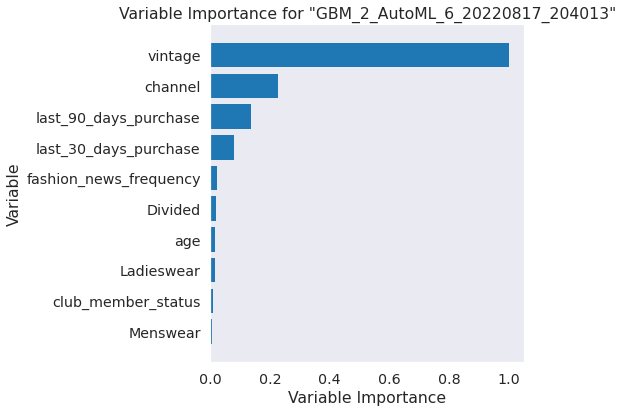

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

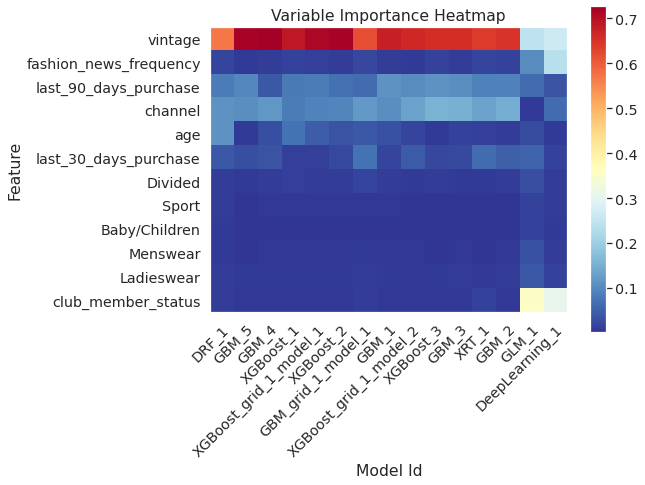

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

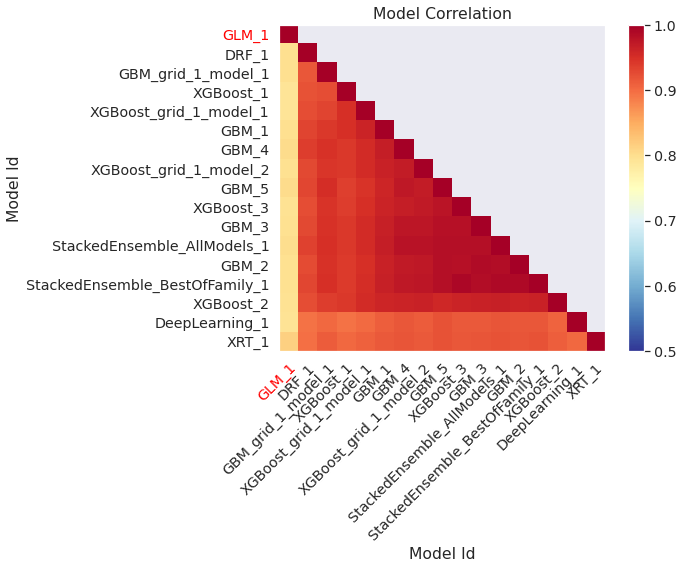

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

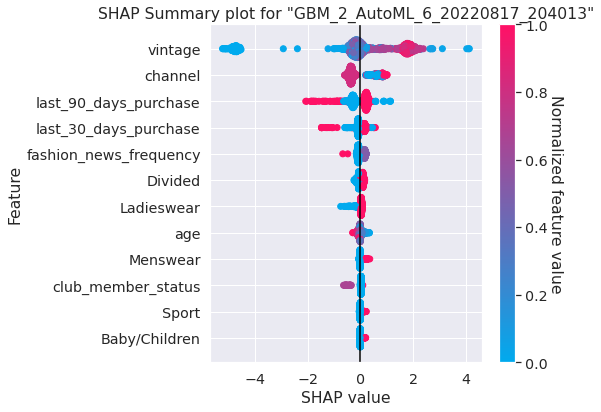

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

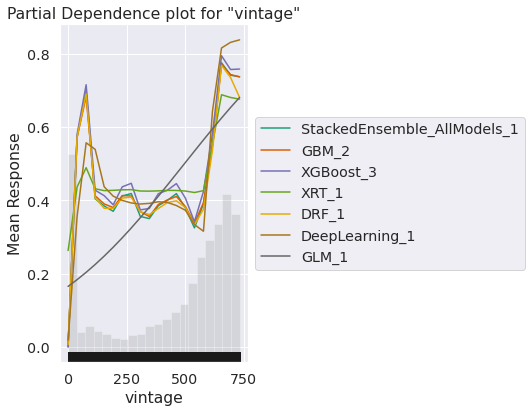

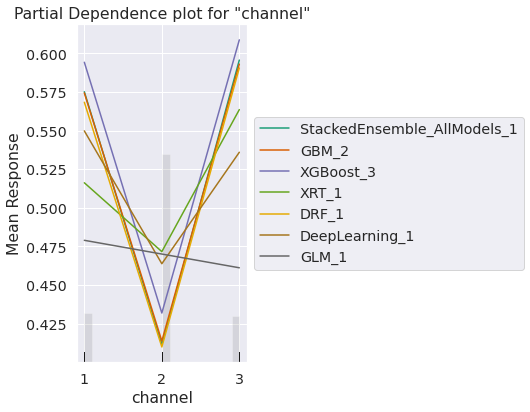

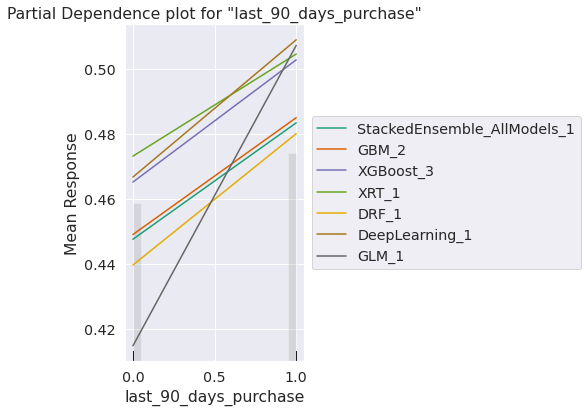

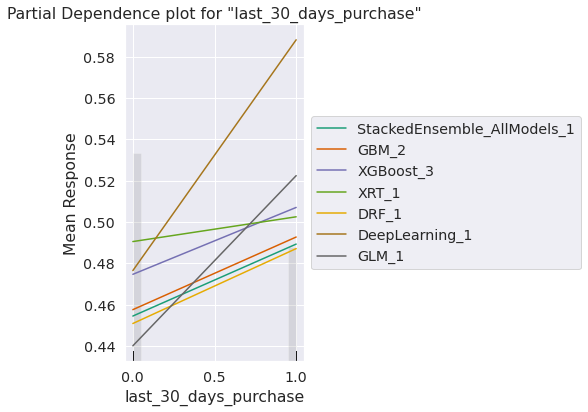

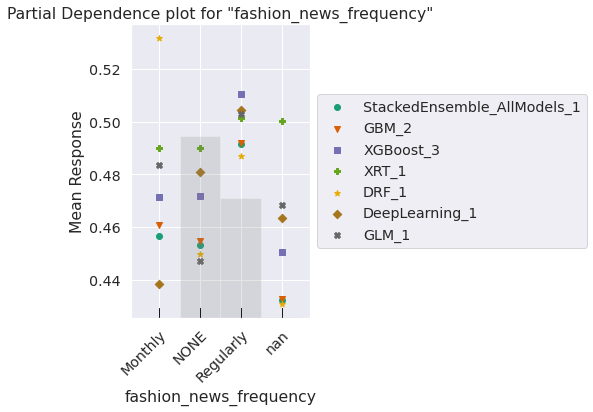

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6))

We can also provide insights into the model's local explainability for individual records.

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,p0,p1
StackedEnsemble_AllModels_1_AutoML_6_20220817_204013,0.863114,0.449132,0.846854,0.235614,0.3881,0.150621,35967,0.137091,StackedEnsemble,1,0.304554,0.695446
StackedEnsemble_BestOfFamily_1_AutoML_6_20220817_204013,0.863054,0.449332,0.846618,0.234032,0.388159,0.150667,19347,0.111491,StackedEnsemble,1,0.312121,0.687879
GBM_2_AutoML_6_20220817_204013,0.862933,0.450174,0.845944,0.234038,0.388202,0.150701,25498,0.030273,GBM,1,0.308828,0.691172
GBM_3_AutoML_6_20220817_204013,0.862853,0.450417,0.845358,0.233956,0.388274,0.150757,28804,0.031403,GBM,1,0.311363,0.688637
XGBoost_3_AutoML_6_20220817_204013,0.862809,0.45052,0.846419,0.233699,0.388805,0.15117,37218,0.00914,XGBoost,1,0.286475,0.713525
GBM_5_AutoML_6_20220817_204013,0.862471,0.451193,0.844555,0.236007,0.38855,0.150971,27860,0.020538,GBM,1,0.32481,0.67519
XGBoost_grid_1_AutoML_6_20220817_204013_model_2,0.861955,0.450764,0.845323,0.236455,0.388918,0.151257,62880,0.006649,XGBoost,1,0.309314,0.690686
GBM_4_AutoML_6_20220817_204013,0.861796,0.451814,0.843681,0.238228,0.389009,0.151328,30938,0.022516,GBM,1,0.280812,0.719188
XGBoost_2_AutoML_6_20220817_204013,0.860624,0.45366,0.844036,0.235402,0.390343,0.152368,30886,0.006085,XGBoost,1,0.201695,0.798305
GBM_1_AutoML_6_20220817_204013,0.860268,0.453881,0.84219,0.23685,0.390123,0.152196,39478,0.026295,GBM,1,0.31071,0.68929


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

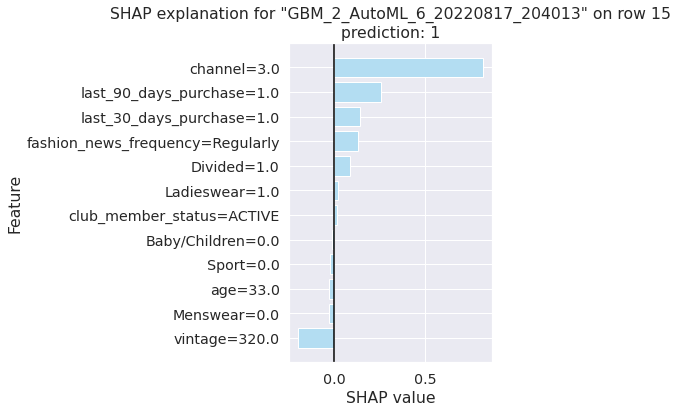

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,p0,p1
StackedEnsemble_AllModels_1_AutoML_6_20220817_204013,0.863114,0.449132,0.846854,0.235614,0.3881,0.150621,35967,0.137091,StackedEnsemble,1,0.304554,0.695446
StackedEnsemble_BestOfFamily_1_AutoML_6_20220817_204013,0.863054,0.449332,0.846618,0.234032,0.388159,0.150667,19347,0.111491,StackedEnsemble,1,0.312121,0.687879
GBM_2_AutoML_6_20220817_204013,0.862933,0.450174,0.845944,0.234038,0.388202,0.150701,25498,0.030273,GBM,1,0.308828,0.691172
GBM_3_AutoML_6_20220817_204013,0.862853,0.450417,0.845358,0.233956,0.388274,0.150757,28804,0.031403,GBM,1,0.311363,0.688637
XGBoost_3_AutoML_6_20220817_204013,0.862809,0.45052,0.846419,0.233699,0.388805,0.15117,37218,0.00914,XGBoost,1,0.286475,0.713525
GBM_5_AutoML_6_20220817_204013,0.862471,0.451193,0.844555,0.236007,0.38855,0.150971,27860,0.020538,GBM,1,0.32481,0.67519
XGBoost_grid_1_AutoML_6_20220817_204013_model_2,0.861955,0.450764,0.845323,0.236455,0.388918,0.151257,62880,0.006649,XGBoost,1,0.309314,0.690686
GBM_4_AutoML_6_20220817_204013,0.861796,0.451814,0.843681,0.238228,0.389009,0.151328,30938,0.022516,GBM,1,0.280812,0.719188
XGBoost_2_AutoML_6_20220817_204013,0.860624,0.45366,0.844036,0.235402,0.390343,0.152368,30886,0.006085,XGBoost,1,0.201695,0.798305
GBM_1_AutoML_6_20220817_204013,0.860268,0.453881,0.84219,0.23685,0.390123,0.152196,39478,0.026295,GBM,1,0.31071,0.68929


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6))

# Future Analysis


##### 1) Just with the transaction details of the customer, we were able to acheive around 77% accuracy for our churn prediction model. For future analysis, we would want to incoporate variables such as session duration, number of visits, drop-off page, number of items in cart etc.

##### 2) We would also suggest the company to optimize their marketing efforts leverging the model. The customers who are less likely to make a purchase should be targeted more with promotional campaigns and exclusive discounts.